In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the network
networks = {
    "Caltech": "./data/Caltech36.gml",
    "MIT": "./data/MIT8.gml",
    "Johns Hopkins": "./data/Johns Hopkins55.gml",
}

Question 2: Social Network Analysis with the Facebook100 Dataset
 The smallest network (Caltech) has 762 nodes in the largest connected component
 (LCC), and the largest has more than 40000 nodes in the LCC.
 Lets use three networks from the FB100: Caltech (with 762 nodes in the LCC), MIT
 (which has 6402 nodes in the LCC), and Johns Hopkins (which has 5157 nodes in
 the LCC).

(a) (1 point) For these three networks plot the degree distribution for each of the
 three networks that you downloaded. What are you able to conclude from these
 degree distributions?

In [4]:
def load_and_process_network(file_path):
    G = nx.read_gml(file_path)
    G = nx.Graph(G)
    LCC = max(nx.connected_components(G), key=len)
    return G.subgraph(LCC).copy()

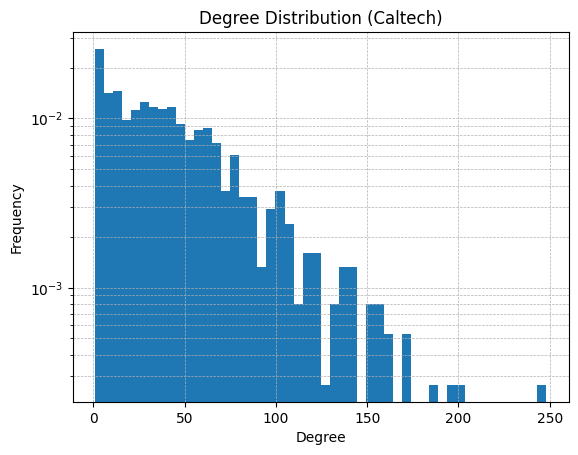

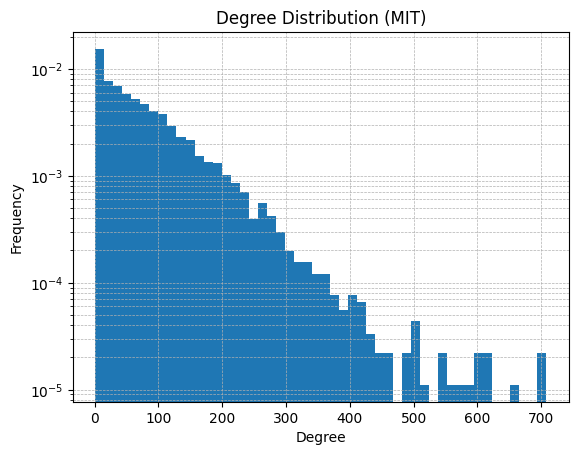

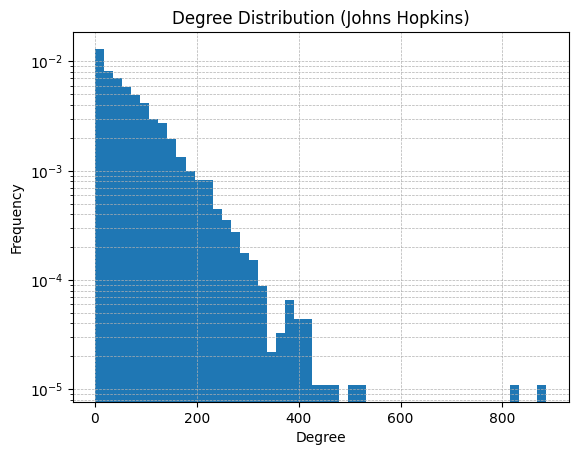

In [4]:
def plot_degree_distribution(G, title):
    degrees = sorted([deg for _, deg in G.degree()], reverse=True)
    plt.hist(degrees, bins=50, density=True)  # Fixed number of bins
    plt.xscale('linear')  # Linear scale for X axis
    plt.yscale('log')  # Log scale for Y axis
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Save the plot as a PNG file in /images 
    plt.savefig(f'./images/{title}.png')
    
    plt.show()

for name, path in networks.items():
    G = load_and_process_network(path)
    plot_degree_distribution(G, f'Degree Distribution ({name})')


(b) (1 point) Compute the global clustering coe cient and mean local clustering
 coe cient for each of the 3 networks. In addition compute the edge density of
 each network. Should either of these networks be construed as sparse? Based on
 the density information and the clustering information what can you said about
 the graph topology?

In [5]:
def compute_metrics(G):
    # Clustering coefficients
    global_clustering = nx.transitivity(G)  # Global clustering coefficient
    mean_local_clustering = nx.average_clustering(G)  # Mean local clustering coefficient
    
    # Edge density
    edge_density = nx.density(G)
    
    return global_clustering, mean_local_clustering, edge_density

for name, path in networks.items():
    G = load_and_process_network(path) 
    global_clustering, mean_local_clustering, edge_density = compute_metrics(G)
    print(f"Metrics for {name}:")
    print(f"  Global Clustering Coefficient: {global_clustering:.4f}")
    print(f"  Mean Local Clustering Coefficient: {mean_local_clustering:.4f}")
    print(f"  Edge Density: {edge_density:.4f}\n")


Metrics for Caltech:
  Global Clustering Coefficient: 0.2913
  Mean Local Clustering Coefficient: 0.4091
  Edge Density: 0.0574

Metrics for MIT:
  Global Clustering Coefficient: 0.1803
  Mean Local Clustering Coefficient: 0.2724
  Edge Density: 0.0123

Metrics for Johns Hopkins:
  Global Clustering Coefficient: 0.1932
  Mean Local Clustering Coefficient: 0.2690
  Edge Density: 0.0140



(c) (1 point) For each network, also draw a scatter plot of the degree versus local
 clustering coe cient. Based on these calculations as well as your previous ones,
 are you able to draw any conclusions about any similarities or di erences between
 the tree networks? What other observations can you make?

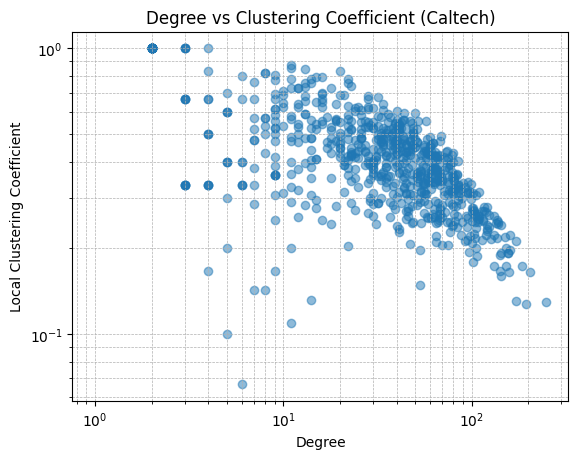

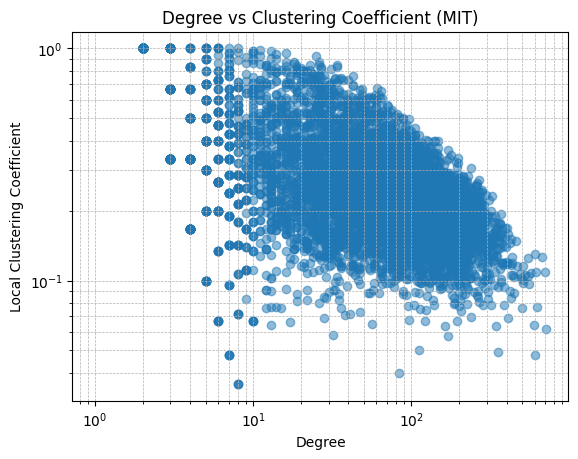

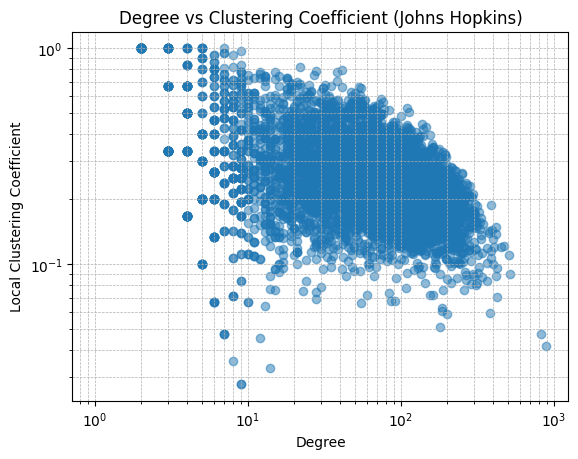

In [6]:
def plot_degree_vs_clustering(G, name):
    degrees = dict(G.degree())
    clustering_coeffs = nx.clustering(G)
    
    x = list(degrees.values())
    y = list(clustering_coeffs.values())
    
    plt.scatter(x, y, alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Local Clustering Coefficient')
    plt.title(f'Degree vs Clustering Coefficient ({name})')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Save the plot as a PNG file in /images 
    plt.savefig(f'./images/{name}_degree_vs_clustering.png')
    
    plt.show()

for name, path in networks.items():
    G = load_and_process_network(path)
    plot_degree_vs_clustering(G, name)

 Question 3: Assortativity Analysis with the Facebook100 Dataset
 In this question we expect you will compute the assortativity on a large set of graphs
 (if possible all the graphs).

 (a) (2 points) Of the FB100 networks, investigate the assortativity patterns for ve
 vertex attributes: (i) student/faculty status, (ii) major, (iii) vertex degree, and
 (iiii) dorm, (iiiii) gender. Treat these networks as simple graphs in your analysis.
 For each vertex attribute, make a scatter plot showing the assortativity versus
 network size n, with log-linear axes for all 100 networks, and a histogram or
 density plot showing the distribution of assortativity values. In both gures,include a line indicating no assortativity. Brie y discuss the degree to which
 vertices do or do not exhibit assortative mixing on each attribute, and specu
late about what kind of processes or tendencies in the formation of Facebook
 friendships might produce this kind of pattern. For example, below are gures
 for assortativity by gender on these networks. The distribution of points spans
 the line of no assortativity, with some values nearly as far below 0 as others are
 above 0. However, the gender attributes do appear to be slightly assortative in
 these social networks: although all values are within 6% in either direction of 0,
 the mean assortativity is 0.02, which is slightly above 0. This suggests a slight
 amount of homophily by gender (like links with like) in the way people friend
 each other on Facebook, although the tendency is very weak. In some schools,
 we see a slight tendency for heterophily (like links with dislike), as one might
 expect if the networks re ected heteronormative dating relationships.

In [7]:
def print_node_attributes(G):
    first_node = list(G.nodes(data=True))[0]
    attributes = first_node[1].keys()
    
    print("Available attributes for the nodes in the network:")
    for attribute in attributes:
        print(f"- {attribute}")

G = load_and_process_network("./data/Caltech36.gml")
print_node_attributes(G)

Available attributes for the nodes in the network:
- student_fac
- gender
- major_index
- second_major
- dorm
- year
- high_school


In [8]:
from tqdm.notebook import tqdm
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob

# Step 1: Load .gml files
data_folder = './data'
gml_files = glob(os.path.join(data_folder, "*.gml"))
# Get 1/4 of the files
gml_files = gml_files[:len(gml_files)]

# Step 2: Initialize results
results = {
    'network': [], 'size': [], 'student_fac': [], 'major_index': [],
    'degree': [], 'dorm': [], 'gender': []
}

In [ ]:
# Step 3: Analyze each network with a progress bar
for gml_file in tqdm(gml_files, desc="Processing networks"):
    G = nx.read_gml(gml_file, label='id')
    G = nx.Graph(G)
    G.remove_edges_from(nx.selfloop_edges(G))  # Remove self-loops

    # Extract network size
    size = len(G.nodes)
    results['network'].append(os.path.basename(gml_file))
    results['size'].append(size)

    # Assortativity calculations
    try:
        results['student_fac'].append(nx.attribute_assortativity_coefficient(G, 'student_fac'))
    except:
        results['student_fac'].append(np.nan)

    try:
        results['major_index'].append(nx.attribute_assortativity_coefficient(G, 'major_index'))
    except:
        results['major_index'].append(np.nan)

    try:
        results['degree'].append(nx.degree_assortativity_coefficient(G))
    except:
        results['degree'].append(np.nan)

    try:
        results['dorm'].append(nx.attribute_assortativity_coefficient(G, 'dorm'))
    except:
        results['dorm'].append(np.nan)

    try:
        results['gender'].append(nx.attribute_assortativity_coefficient(G, 'gender'))
    except:
        results['gender'].append(np.nan)

# Step 4: Convert results to DataFrame
results_df = pd.DataFrame(results)


# Save results to a CSV for further analysis
results_df.to_csv('assortativity_results.csv', index=False)

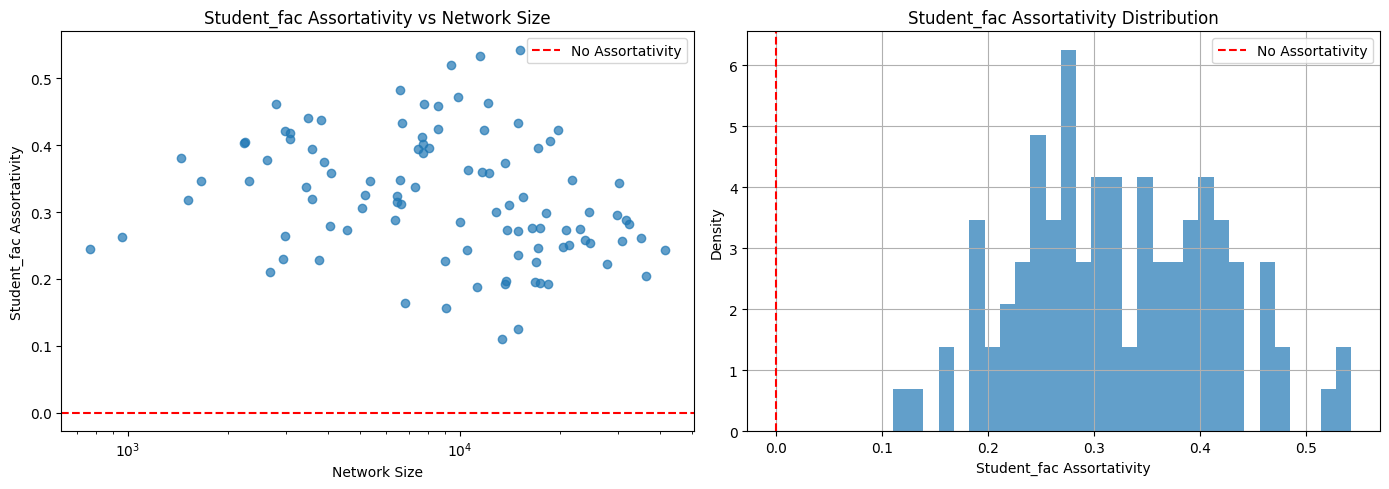

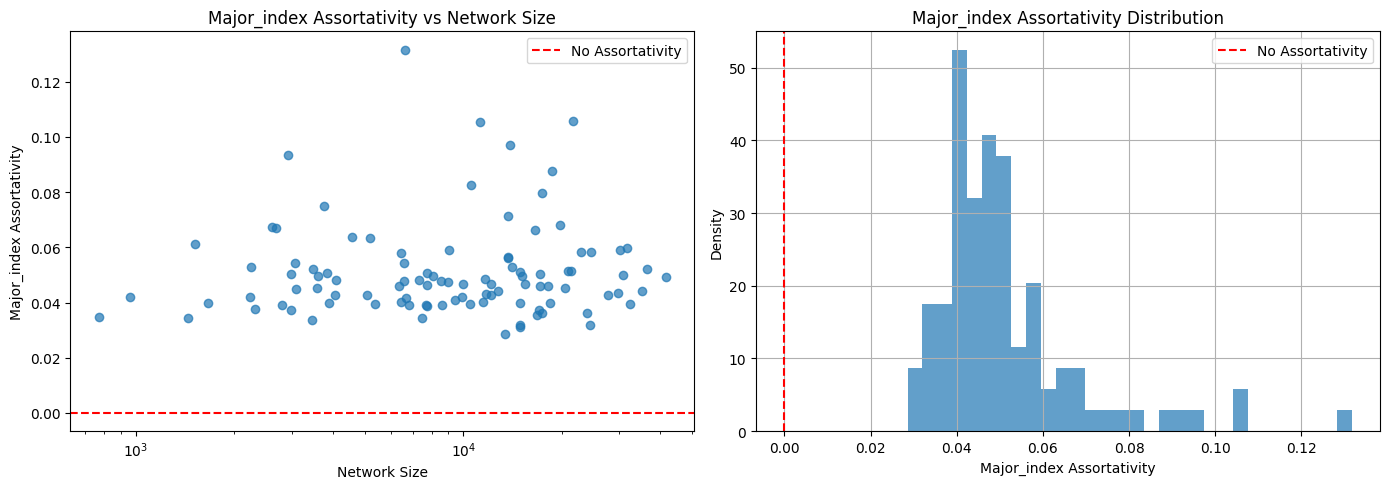

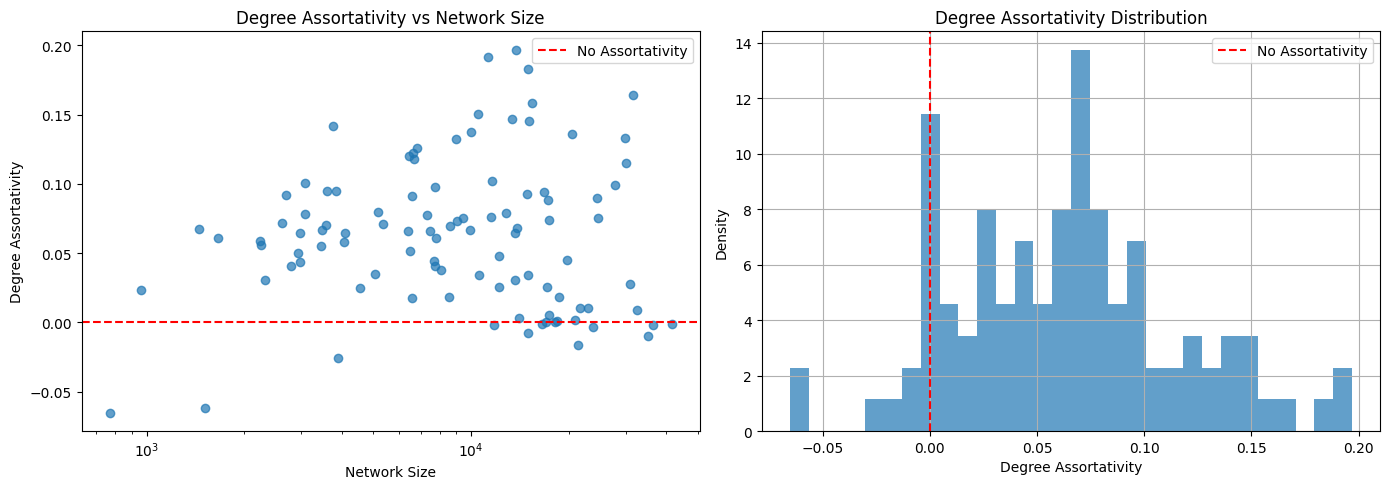

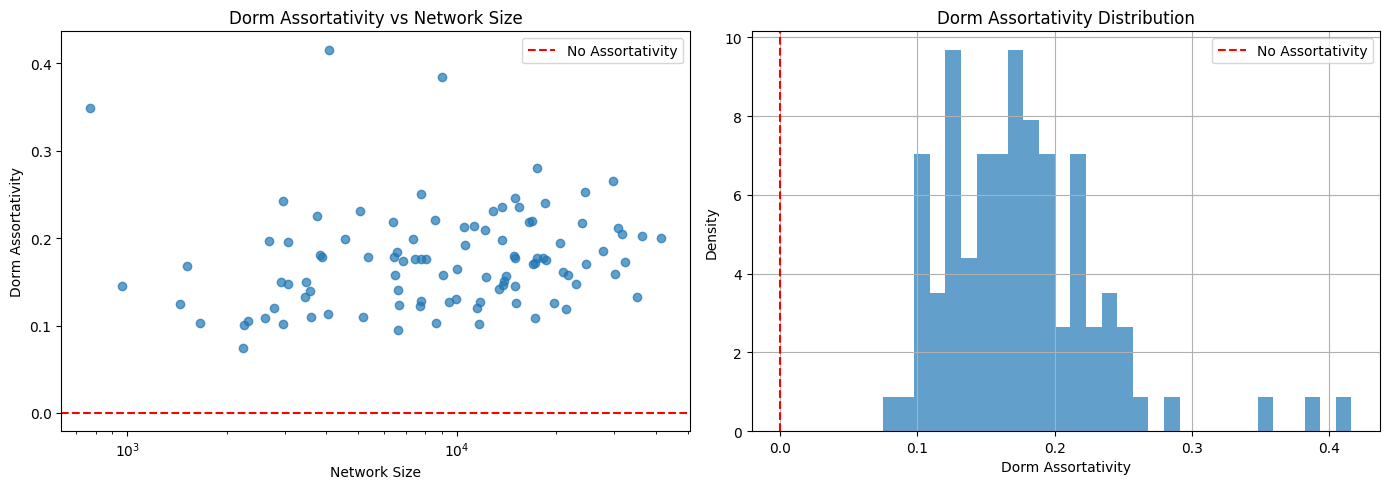

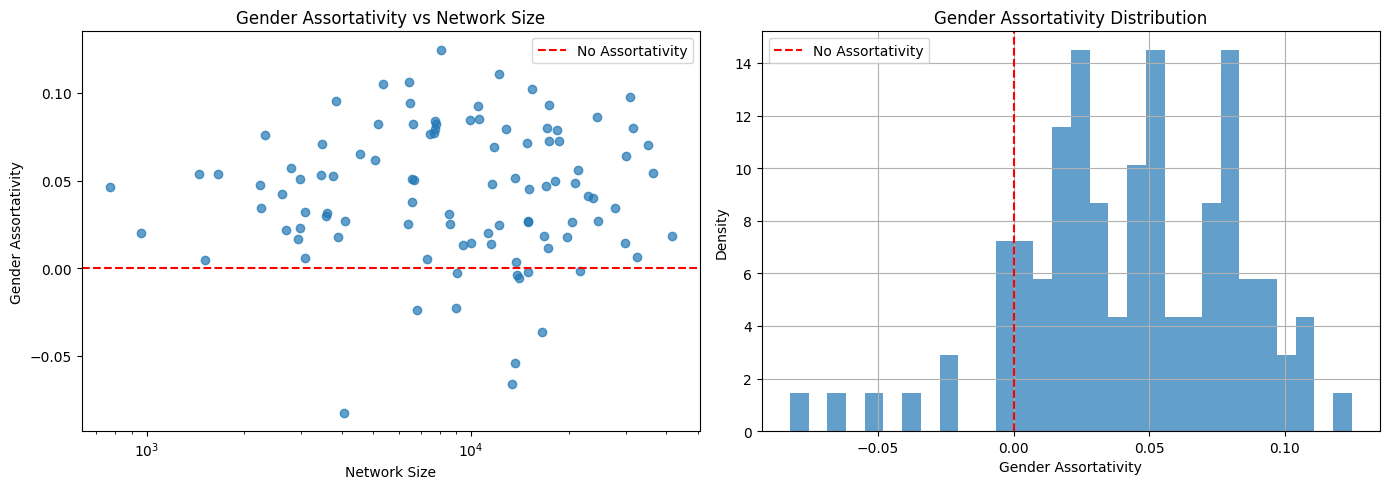

In [21]:

# Step 5: Visualization
attributes = ['student_fac', 'major_index', 'degree', 'dorm', 'gender']
for attr in attributes:
    # Scatter plot
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Scatter plot
    ax[0].scatter(results_df['size'], results_df[attr], alpha=0.7)
    ax[0].axhline(0, color='red', linestyle='--', label='No Assortativity')
    ax[0].set_xscale('log')
    ax[0].set_title(f'{attr.capitalize()} Assortativity vs Network Size')
    ax[0].set_xlabel('Network Size')
    ax[0].set_ylabel(f'{attr.capitalize()} Assortativity')
    ax[0].legend()

    # Histogram/Density plot
    results_df[attr].dropna().hist(bins=30, alpha=0.7, density=True, ax=ax[1])
    ax[1].axvline(0, color='red', linestyle='--', label='No Assortativity')
    ax[1].set_title(f'{attr.capitalize()} Assortativity Distribution')
    ax[1].set_xlabel(f'{attr.capitalize()} Assortativity')
    ax[1].set_ylabel('Density')
    ax[1].legend()
    # Save plot in a file
    plt.savefig(f'./images/assortativity_{attr}.png') 

    plt.tight_layout()
    plt.show()

    


Question 4: Link prediction
 In this question we expect you will compute the link prediction algorithms on a large
 set of graphs (> 10).

 (a) Read the following documents [4].
 
 (b) (2 points) Implement the following link prediction metrics: common neighbors,
 jaccard, Adamic/Adar. We use the scikit-learn2 API as an example for our
 implementation of the link prediction metrics. Please use the implementation
 (in listing. 1) as an example. Your implementation should inherit from the class
 LinkPrediction de ned in listing. 1. You should implement yourself the
 given metrics, dont used the ones de ned in Network

In [9]:
from abc import ABC, abstractmethod
import numpy as np
import random
from itertools import combinations

# Base class for link prediction metrics
class LinkPrediction(ABC):
    def __init__(self, graph):
        """
        Constructor

        Parameters
        ----------
        graph: NetworkX graph
            The input graph
        """
        self.graph = graph
        self.N = len(graph)

    def neighbors(self, v):
        """
        Return the neighbors list of a node

        Parameters
        ----------
        v: int
            Node ID
        
        Return
        ------
        list
            Neighbors of the node
        """
        neighbors_list = self.graph.neighbors(v) 
        return list(neighbors_list)

    @abstractmethod
    def fit(self):
        """
        Compute the score between two nodes.
        Must be implemented in subclasses.
        """
        pass

class CommonNeighbors(LinkPrediction):
    def fit(self):
        result = []
        for u, v in combinations(self.graph.nodes(), 2):
            if not self.graph.has_edge(u, v):
                neighbors_u = set(self.neighbors(u))
                neighbors_v = set(self.neighbors(v))
                metric = len(neighbors_u & neighbors_v)
                result.append((u, v, metric))
        return result

class Jaccard(LinkPrediction):
    def fit(self):
        result = []
        for u, v in combinations(self.graph.nodes(), 2):
            if not self.graph.has_edge(u, v):
                neighbors_u = set(self.neighbors(u))
                neighbors_v = set(self.neighbors(v))
                union_size = len(neighbors_u | neighbors_v)

                metric = 0
                if union_size != 0:
                    metric = len(neighbors_u & neighbors_v) / union_size

                result.append((u, v, metric))
        return result

class AdamicAdar(LinkPrediction):
    def fit(self):
        result = []
        for u, v in combinations(self.graph.nodes(), 2):
            if not self.graph.has_edge(u, v):
                neighbors_u = set(self.neighbors(u))
                neighbors_v = set(self.neighbors(v))
                common_neighbors = neighbors_u & neighbors_v

                metric = sum(1 / np.log(len(self.neighbors(z))) for z in common_neighbors if len(self.neighbors(z)) > 1)
                result.append((u, v, metric))
        return result

(c) (2 points) Evaluating a link predictor:

1. Select graph Gf b(V, E) in the Facebook100 dataset.
2. Randomly remove a given fraction f ∈ [0.05, 0.1, 0.15, 0.2] of edges Eremoved from the original graph Gf b.
3. For each node pair in the graph |V| × |V|, compute the link predictor metrics of interest p, these are the predicted "friendship" Epredict.
4. Sort in decreasing order of confidence as a function p from the node pair Epredict and then take the first k pairs of nodes E(top@k)predict.
5. Compute the size of the intersection between the edge set of removed edges and the edge set of predicted node |Eremoved ∩ E(top@k)predict|. Then compute the top@k, recall@k, and precision@k (for k = 50, 100, 200, ..., 400) using the k best scored edges provided by the link predictor algorithm (see [5] for more information). The top@k predictive rate is the percentage of correctly classified positive samples among the top k instances in the ranking produced by a link predictor P.

Precision = |TP| / (|TP| + |FP|)

Recall = |TP| / (|TP| + |FN|)

Prediction Terminology: TP stands for true positives, TN stands for true negatives, FP stands for false positives, and FN stands for false negatives.

In [60]:
# Function to evaluate link prediction metrics
def evaluate_link_prediction(graph, fraction_removed=0.1, K_values=[10]):
    # Remove a fraction of edges
    edges = list(graph.edges())
    random.shuffle(edges)
    num_edges = len(edges)
    num_removed = int(fraction_removed * num_edges)
    removed_edges = edges[:num_removed]

    graph_train = graph.copy()
    graph_train.remove_edges_from(removed_edges)

    # Initialize the metrics
    metrics = [CommonNeighbors(graph_train), Jaccard(graph_train), AdamicAdar(graph_train)]
    metric_names = [metric.__class__.__name__ for metric in metrics]
    results = {name: [] for name in metric_names}

    # Compute the metrics for each pair of nodes in graph_train 
    # that are not connected by an edge
    for metric in metrics:
        results[metric.__class__.__name__] = metric.fit()

    # Sort the results in descending order of confidence as a function of the metric
    # from the node pair E_predict
    for name in metric_names:
        results[name] = sorted(results[name], key=lambda x: x[2], reverse=True)

    evaluation_results = {name: {} for name in metric_names}
    
    for K in K_values:
        # Take the first K pairs of nodes E^(top@k)_predict
        top_k_results = {name: results[name][:K] for name in metric_names}

        # Compute the size of intersection between the edge set of removed edges and the edge
        # set if predicted node |E_removed ∩ E^(top@k)_predict|
        intersection_sizes = {name: 0 for name in metric_names}
        for u, v in removed_edges:
            for name in metric_names:
                predicted_edges = [(edge[0], edge[1]) for edge in top_k_results[name]]
                if (u, v) in predicted_edges or (v, u) in predicted_edges:
                    intersection_sizes[name] += 1

        # Compute the top@k, recall@k, and precision@k
        for name in metric_names:
            top_k = intersection_sizes[name]  # True positives in the top K predictions
            precision_k = top_k / K
            recall_k = top_k / num_removed
            evaluation_results[name][K] = {
                'top': top_k,
                'precision': precision_k,
                'recall': recall_k
            }

    return evaluation_results


(d) (2 points) Choose a couple of graphs in the facebook100 dataset run and evalu-
ate each link predictor on them, and conclude on the efficiency of the following
metrics: common neighbors, jaccard, Adamic/Adar.
NET 4103/7431 Page 5 / 8


In [61]:
from tqdm.notebook import tqdm
import pandas as pd 
import os
import random

# Load the network
networks_predictions = {
    "Caltech": "./data/Caltech36.gml",
    "Reed98": "./data/Reed98.gml",
    "Hamilton46": "./data/Hamilton46.gml",
    "Swarthmore42": "./data/Swarthmore42.gml",
    "Amherst41": "./data/Amherst41.gml",
    "Trinity100": "./data/Trinity100.gml",
    "Bowdoin47": "./data/Bowdoin47.gml",
    "Vassar85": "./data/Vassar85.gml",
    "Oberlin44": "./data/Oberlin44.gml",
    "Middlebury45": "./data/Middlebury45.gml",
    "Haverford76": "./data/Haverford76.gml",
    "Williams40": "./data/Williams40.gml",
    "Bucknell39": "./data/Bucknell39.gml",
    "Wesleyan43": "./data/Wesleyan43.gml",
    "Smith60": "./data/Smith60.gml",
}

# Define metrics
fractions = [0.05, 0.1, 0.15, 0.2]  # Fraction of edges to remove
k_values = [50, 100, 150, 200, 250, 300, 350, 400] # Number of top predictions to consider
metrics_names = ['CommonNeighbors', 'Jaccard', 'AdamicAdar']

# Evaluate metrics
results = {}
total_iterations = len(networks_predictions) * len(fractions) * len(k_values)
with tqdm(total=total_iterations, desc="Overall Progress") as overall_progress:
    for name, path in networks_predictions.items():
        G = nx.read_gml(path)
        for fraction in fractions:
            # Check if the result already exists in the CSV
            if os.path.exists('link_prediction_results.csv'):
                existing_results = pd.read_csv('link_prediction_results.csv')
                if ((existing_results['network'] == name) & 
                    (existing_results['fraction'] == fraction)).any():
                    overall_progress.update(len(k_values))
                    continue

            # Evaluate link prediction for all K values
            evaluation_results = evaluate_link_prediction(G, fraction_removed=fraction, K_values=k_values)
            for k in k_values:
                results[(name, fraction, k)] = {metric: evaluation_results[metric][k] for metric in metrics_names}
            
            # Save all results to a csv file
            results_df = pd.DataFrame(results).T
            results_df.to_csv('link_prediction_results.csv', mode='a', header=not os.path.exists('link_prediction_results.csv'), index_label=['network', 'fraction', 'k'])
            overall_progress.update(len(k_values))

Overall Progress:   0%|          | 0/480 [00:00<?, ?it/s]

In [62]:
# Load the results
with open('link_prediction_results.csv', 'r') as file:
    results_df = pd.read_csv(file, index_col=[0, 1, 2])

# Preprocess the results for plotting
# Extract 'top', 'precision', and 'recall' values from the dictionaries
def extract_metric(df, metric_name):
    return df.apply(lambda x: eval(x)[metric_name])

for metric in ['CommonNeighbors', 'Jaccard', 'AdamicAdar']:
    results_df[f'{metric}_top'] = extract_metric(results_df[metric], 'top')
    results_df[f'{metric}_precision'] = extract_metric(results_df[metric], 'precision')
    results_df[f'{metric}_recall'] = extract_metric(results_df[metric], 'recall')

# Drop the original columns with dictionaries
results_df = results_df.drop(columns=['CommonNeighbors', 'Jaccard', 'AdamicAdar'])

# Take the average of all different networks
results_df = results_df.groupby(['fraction', 'k']).mean().reset_index()
results_df

,fraction,k,CommonNeighbors_top,CommonNeighbors_precision,CommonNeighbors_recall,Jaccard_top,Jaccard_precision,Jaccard_recall,AdamicAdar_top,AdamicAdar_precision,AdamicAdar_recall
0,0.05,50,27.134860,0.542697,0.007289,21.814249,0.436285,0.005799,27.445293,0.548906,0.007234
1,0.05,100,43.669264,0.436693,0.011242,41.178355,0.411784,0.010631,44.750649,0.447506,0.011444
2,0.05,150,58.780894,0.391873,0.015870,57.258545,0.381724,0.014893,62.780018,0.418533,0.016836
3,0.05,200,72.628848,0.363144,0.019092,81.501319,0.407507,0.020464,76.145998,0.380730,0.020035
4,0.05,250,80.183764,0.320735,0.020891,99.139161,0.396557,0.024752,84.788582,0.339154,0.021867
5,0.05,300,97.179186,0.323931,0.024184,110.376471,0.367922,0.027959,103.409955,0.344700,0.025670
6,0.05,350,114.172635,0.326208,0.028210,127.332415,0.363807,0.031837,120.237833,0.343537,0.029607
7,0.05,400,118.345760,0.295864,0.029838,140.217148,0.350543,0.034672,123.858341,0.309646,0.031046
8,0.10,50,34.645833,0.692917,0.004459,26.202652,0.524053,0.003310,34.415720,0.688314,0.004400
9,0.10,100,61.224038,0.612240,0.007731,51.300962,0.513010,0.006443,62.652885,0.626529,0.007852


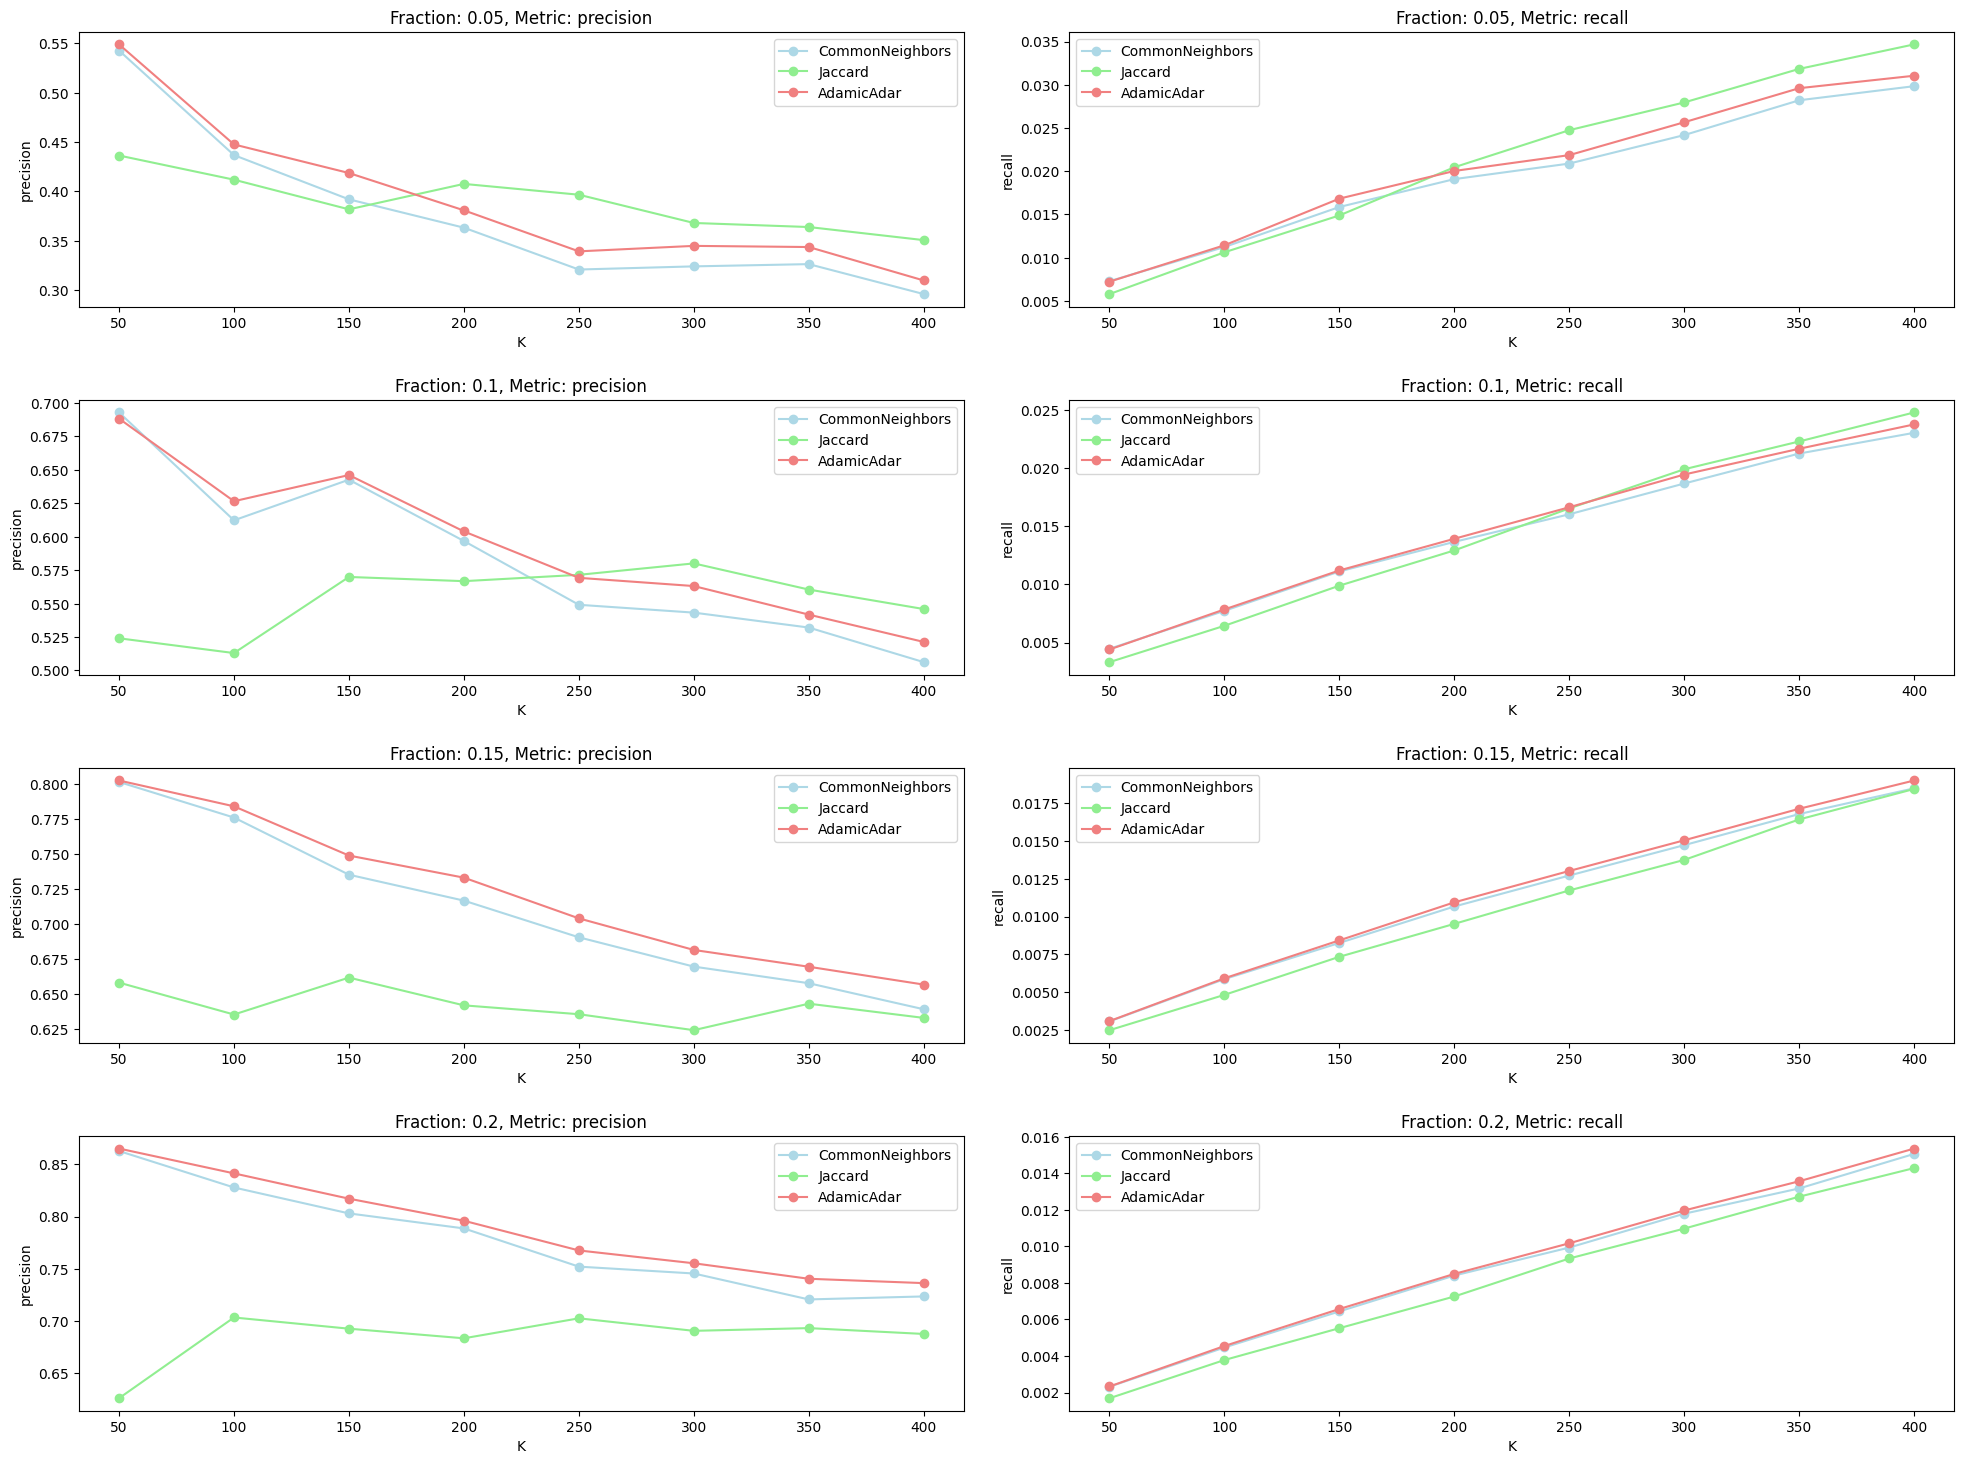

In [64]:
# Define metrics
metrics = ['precision', 'recall']
colors = ['lightblue', 'lightgreen', 'lightcoral']
metrics_names = ['CommonNeighbors', 'Jaccard', 'AdamicAdar']

# Plot results
# 3 set graphs: precision, recall, top
# each set with 4 subgraphs
# x-axis: K values
# y-axis: metric values
# 1 graph for each fraction of removed edges
# one line for prediction method
# set of graph is column
# 3x4 grid

fig, ax = plt.subplots(4, 2, figsize=(20, 15))
for i, fraction in enumerate(fractions):
    for j, metric in enumerate(metrics):
        for k, name in enumerate(metrics_names):
            y_values = results_df[(results_df['fraction'] == fraction) & (results_df['k'].isin(k_values))][f'{name}_{metric}'].values
            ax[i, j].plot(k_values, y_values, label=name, color=colors[k], marker='o')
            ax[i, j].set_title(f"Fraction: {fraction}, Metric: {metric}")
            ax[i, j].set_xlabel('K')
            ax[i, j].set_ylabel(metric)
            ax[i, j].legend()

plt.tight_layout(pad=2.0)
plt.savefig('./images/link_prediction_metrics.png')
plt.show()


Question 5: Find missing labels with the label propagation algorithms
In this question we expect you will compute the label propagation algorithm on a
large set of graphs (> 10). We studied in class two algorithms with the name
”label propagation” that have different objective, choose wisely the one
to implement.

(a) Read the following document [6].
(b) (2 points) Implement in python the label propagation algorithm [6], please consider pytorch3 and networkx4 for the development of your algorithm

In [41]:
import networkx as nx
import random
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

def remove_random_labels(graph, attribute, fraction):
    nodes = list(graph.nodes(data=True))
    random.shuffle(nodes)
    num_to_remove = int(len(nodes) * fraction)
    removed_graph = graph.copy()
    original_labels = {}
    for node, data in nodes[:num_to_remove]:
        if attribute in data:
            original_labels[node] = data[attribute]
            del removed_graph.nodes[node][attribute]
    return removed_graph, original_labels

def label_propagation(graph, attribute, max_iterations=100, alpha=0.85):
    labels = {node: data.get(attribute) for node, data in graph.nodes(data=True)}
    nodes = list(graph.nodes())
    for _ in range(max_iterations):
        updated = False
        random.shuffle(nodes)
        for node in nodes:
            if labels[node] is None:
                neighbor_labels = [
                    labels[neighbor] for neighbor in graph.neighbors(node)
                    if labels[neighbor] is not None
                ]
                if neighbor_labels:
                    new_label = max(set(neighbor_labels), key=neighbor_labels.count)
                    if labels[node] != new_label:
                        labels[node] = new_label
                        updated = True
        if not updated:
            break
    return labels


(d) for each case of the following percentage of missing attributes: 10%,
20% and 30% and for each of the following attributes: the ”dorm”, ”major”,
”gender” show the mean absolute error and accuracy score (as defined in eq. 1)
of the label propagation algorithm as in the example provided in Table 1 for
the Duke University Facebook network. Note we can use the formula eq. 1
for computing the accuracy. However, a better approach would have been to
compute the F1-score [7].

In [95]:

from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

def evaluate_label_propagation(graph, attribute, fractions):
    results = []
    for fraction in fractions:
        graph_with_missing, original_labels = remove_random_labels(graph, attribute, fraction)
        recovered_labels = label_propagation(graph_with_missing, attribute)
        y_true = [original_labels[node] for node in original_labels if node in recovered_labels and original_labels[node] is not None]
        y_pred = [recovered_labels[node] for node in original_labels if node in recovered_labels and original_labels[node] is not None]
        
        # Ensure y_true and y_pred contain the same set of labels
        y_true_filtered = []
        y_pred_filtered = []
        for true, pred in zip(y_true, y_pred):
            if true is not None and pred is not None:
                y_true_filtered.append(true)
                y_pred_filtered.append(pred)
        
        accuracy = accuracy_score(y_true_filtered, y_pred_filtered)
        mae = np.mean([0 if pred == true else 1 for pred, true in zip(y_pred_filtered, y_true_filtered)])
        results.append({'Fraction Removed': fraction, 'Accuracy': accuracy, 'MAE': mae})
    return pd.DataFrame(results)

# Combine results into a table
def run_experiments(graphs, attribute):
    combined_results = []
    for graph_name, graph in tqdm(graphs.items(), desc="Running experiments", leave=False):
        results = evaluate_label_propagation(graph, attribute, fractions=[0.1, 0.2, 0.3, 0.4])
        results['Graph'] = graph_name
        results['Attribute'] = attribute
        combined_results.append(results)
    return pd.concat(combined_results)


In [101]:
# Load the network
networks_list = {
    "Caltech": "./data/Caltech36.gml",
    "Reed98": "./data/Reed98.gml",
    "Hamilton46": "./data/Hamilton46.gml",
    "Swarthmore42": "./data/Swarthmore42.gml",
    "Amherst41": "./data/Amherst41.gml",
    "Trinity100": "./data/Trinity100.gml",
    "Bowdoin47": "./data/Bowdoin47.gml",
    "Vassar85": "./data/Vassar85.gml",
    "Oberlin44": "./data/Oberlin44.gml",
    "Middlebury45": "./data/Middlebury45.gml",
    "Haverford76": "./data/Haverford76.gml",
    "Williams40": "./data/Williams40.gml",
    "Bucknell39": "./data/Bucknell39.gml",
    "Wesleyan43": "./data/Wesleyan43.gml",
    "Smith60": "./data/Smith60.gml",
    "Duke14": "./data/Duke14.gml",
}

graphs = {}
for name, path in networks_list.items():
    G = load_and_process_network(path)
    # G = nx.read_gml(path)
    graphs[name] = G

print("Loaded networks")


Loaded networks


In [102]:
# Evaluate for 'dorm', 'major', and 'gender'
dorm_results = run_experiments(graphs, 'dorm')
major_results = run_experiments(graphs, 'major_index')
gender_results = run_experiments(graphs, 'gender')

# Combine all results into a single DataFrame
all_results = pd.concat([dorm_results, major_results, gender_results])

# Display results
print(all_results)

Running experiments:   0%|          | 0/16 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/16 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/16 [00:00<?, ?it/s]

    Fraction Removed  Accuracy       MAE    Graph Attribute
0                0.1  0.855263  0.144737  Caltech      dorm
1                0.2  0.756579  0.243421  Caltech      dorm
2                0.3  0.736842  0.263158  Caltech      dorm
3                0.4  0.687500  0.312500  Caltech      dorm
0                0.1  0.604167  0.395833   Reed98      dorm
..               ...       ...       ...      ...       ...
3                0.4  0.876263  0.123737  Smith60    gender
0                0.1  0.614372  0.385628   Duke14    gender
1                0.2  0.620132  0.379868   Duke14    gender
2                0.3  0.610793  0.389207   Duke14    gender
3                0.4  0.613303  0.386697   Duke14    gender

[192 rows x 5 columns]


In [103]:
# Group by 'Fraction Removed' and 'Attribute' and calculate the mean for 'Accuracy' and 'MAE'
average_results = all_results.groupby(['Fraction Removed', 'Attribute']).agg({
	'Accuracy': 'mean',
	'MAE': 'mean'
}).reset_index()

# Display the average results
print(average_results)

    Fraction Removed    Attribute  Accuracy       MAE
0                0.1         dorm  0.546261  0.453739
1                0.1       gender  0.591978  0.408022
2                0.1  major_index  0.291098  0.708902
3                0.2         dorm  0.531658  0.468342
4                0.2       gender  0.593783  0.406217
5                0.2  major_index  0.266892  0.733108
6                0.3         dorm  0.523806  0.476194
7                0.3       gender  0.589180  0.410820
8                0.3  major_index  0.252305  0.747695
9                0.4         dorm  0.516519  0.483481
10               0.4       gender  0.589117  0.410883
11               0.4  major_index  0.242548  0.757452


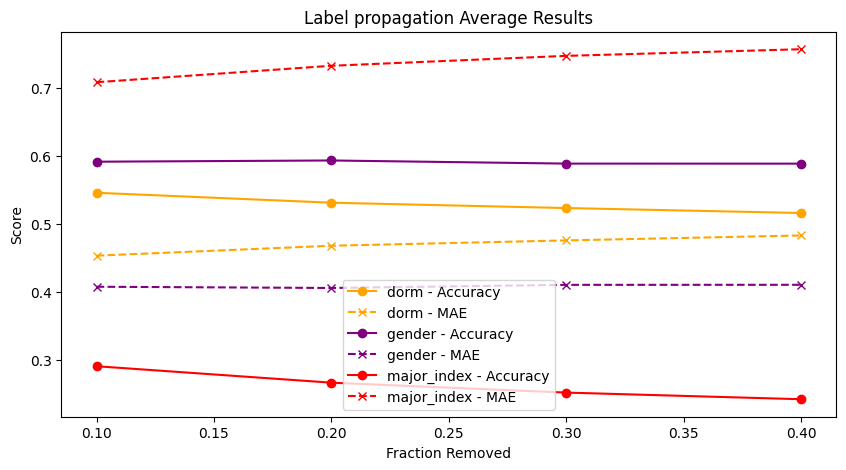

In [105]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
colors = {'dorm': 'orange', 'gender': 'purple', 'major_index': 'red'}

for attribute in average_results['Attribute'].unique():
    subset = average_results[average_results['Attribute'] == attribute]
    ax.plot(subset['Fraction Removed'], subset['Accuracy'], marker='o', label=f'{attribute} - Accuracy', color=colors[attribute])
    ax.plot(subset['Fraction Removed'], subset['MAE'], marker='x', linestyle='--', label=f'{attribute} - MAE', color=colors[attribute])

ax.set_title("Label propagation Average Results")
ax.set_xlabel('Fraction Removed')
ax.set_ylabel('Score')
ax.legend(fontsize='small')
plt.xticks(rotation=0)
plt.savefig('./images/label_propagation_results.png')
plt.show()


In [110]:
# Pivot the data for MAE using pivot_table to handle duplicates
mae_table = all_results.pivot_table(index='Attribute', columns='Fraction Removed', values='MAE', aggfunc='mean')

# Pivot the data for Accuracy using pivot_table to handle duplicates
accuracy_table = all_results.pivot_table(index='Attribute', columns='Fraction Removed', values='Accuracy', aggfunc='mean')

(e) (1 point) Conclude on the accuracy of the label propagation algorithm for dif-
ferent labels, could you explain why is there such difference in the accuracy
between each type of label ?

In [109]:
accuracy_table

Fraction Removed,0.1,0.2,0.3,0.4
Attribute,,,,
dorm,0.546261,0.531658,0.523806,0.516519
gender,0.591978,0.593783,0.589180,0.589117
major_index,0.291098,0.266892,0.252305,0.242548


In [108]:
mae_table

Fraction Removed,0.1,0.2,0.3,0.4
Attribute,,,,
dorm,0.453739,0.468342,0.476194,0.483481
gender,0.408022,0.406217,0.410820,0.410883
major_index,0.708902,0.733108,0.747695,0.757452


Question 6: Communities detection with the FB100 datasets
Formulate a research question about group formation among students in the FB100
dataset. To validate your hypothesis, use only a few universities and a community
detection algorithm of your choice to extract the different groups of students. To help
you formulate a research question, some of the following references might be useful
[8, 9] and section 3.4 in [2].

(a) (1 point) Formulate a research question about group formation in FB100 and
explain your hypothesis.

(b) (1 point) Write the code to validate your research question and show the result
using a few selected community detection algorithms and graphs.

(c) (1 point) Explain the results and conclude whether your experiment confirms
your initial hypothesis.

In [1]:
import networkx as nx
import os
import pandas as pd
from cdlib import algorithms, evaluation
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import random

def load_fb100_graphs(data_dir, num_networks):
    graphs = {}
    files = [file for file in os.listdir(data_dir) if file.endswith(".gml")]
    selected_files = random.sample(files, min(num_networks, len(files)))
    
    for file in selected_files:
        graph_name = file.split(".")[0]
        graphs[graph_name] = nx.read_gml(os.path.join(data_dir, file))
        print(f"{graph_name} has {graphs[graph_name].number_of_nodes()} nodes")
    
    return graphs

def analyze_communities(graph, attribute):
    partition = algorithms.louvain(graph)

    # Compute modularity score
    modularity = evaluation.newman_girvan_modularity(graph, partition).score

    # Compute assortativity (Newman’s r) for the given attribute
    assortativity = compute_assortativity(graph, attribute)

    return modularity, assortativity

def compute_assortativity(graph, attribute):
    node_attr = {node: data.get(attribute, None) for node, data in graph.nodes(data=True)}
    # Ensure attribute exists for calculation
    if all(v is None for v in node_attr.values()):
        return None  # Return None if attribute is missing
    return nx.attribute_assortativity_coefficient(graph, attribute)

# Run the experiment
data_dir = "./data/"
graphs = load_fb100_graphs(data_dir, num_networks=30)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'graph_tool', 'bayanpy', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'leidenalg'}
Yale4 has 8578 nodes
Johns Hopkins55 has 5180 nodes
MSU24 has 32375 nodes
Bucknell39 has 3826 nodes
UCSB37 has 14935 nodes
Wisconsin87 has 23842 nodes
Northeastern19 has 13882 nodes
Berkeley13 has 22937 nodes
Pepperdine86 has 3445 nodes
Wesleyan43 has 3593 nodes
UPenn7 has 14916 nodes
BU10 has 19700 nodes
USFCA72 has 2682 nodes
UVA16 has 17196 nodes
Tennessee95 has 16979 nodes
Reed98 has 962 nodes
William77 has 6472 nodes
Oberlin44 has 2920 nodes
Harvard1 has 15126 nodes
American75 has 6386 nodes
Princeton12 has 6596 nodes
Mich67 has 3748 nodes
Virginia63 has 21325 nodes
UC33 has 16808 nodes
Nor

In [2]:
results = []
for graph_name, graph in tqdm(graphs.items(), desc="Analyzing networks"):
    modularity, assortativity = analyze_communities(graph, "dorm")
    results.append({
        "Graph": graph_name,
        "Modularity": modularity,
        "Assortativity (Dorm)": assortativity,
        "Size": graph.number_of_nodes()
    })

Analyzing networks:   0%|          | 0/30 [00:00<?, ?it/s]

In [3]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

              Graph  Modularity  Assortativity (Dorm)   Size
0             Yale4    0.431514              0.221306   8578
1   Johns Hopkins55    0.453284              0.109414   5180
2             MSU24    0.452491              0.173115  32375
3        Bucknell39    0.482959              0.181180   3826
4            UCSB37    0.436996              0.177932  14935
5       Wisconsin87    0.432478              0.217336  23842
6    Northeastern19    0.480176              0.151337  13882
7        Berkeley13    0.417409              0.147276  22937
8      Pepperdine86    0.410342              0.132968   3445
9        Wesleyan43    0.437241              0.110375   3593
10           UPenn7    0.454182              0.180090  14916
11             BU10    0.473086              0.125746  19700
12          USFCA72    0.421647              0.196693   2682
13            UVA16    0.456994              0.172200  17196
14      Tennessee95    0.414542              0.170044  16979
15           Reed98    0

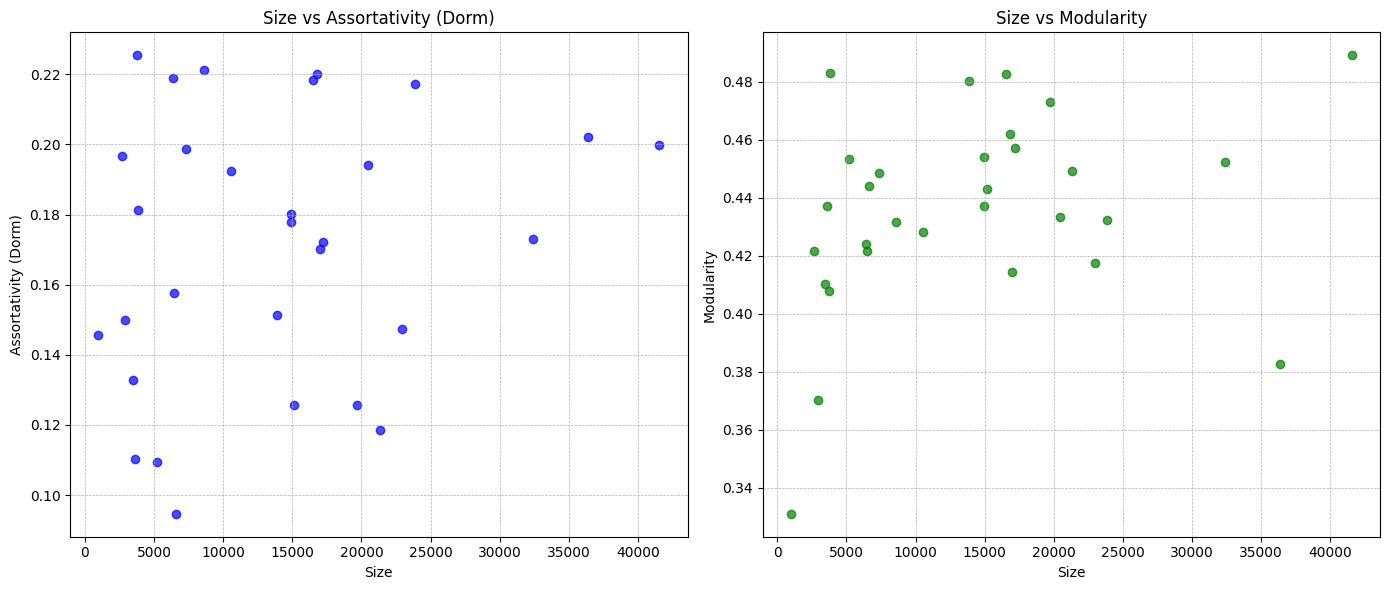

In [4]:
# Scatter plot of Size vs Assortativity and Size vs Modularity
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Size vs Assortativity
ax[0].scatter(results_df['Size'], results_df['Assortativity (Dorm)'], alpha=0.7, color='blue')
ax[0].set_title('Size vs Assortativity (Dorm)')
ax[0].set_xlabel('Size')
ax[0].set_ylabel('Assortativity (Dorm)')
ax[0].grid(True, linestyle="--", linewidth=0.5)

# Size vs Modularity
ax[1].scatter(results_df['Size'], results_df['Modularity'], alpha=0.7, color='green')
ax[1].set_title('Size vs Modularity')
ax[1].set_xlabel('Size')
ax[1].set_ylabel('Modularity')
ax[1].grid(True, linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.savefig('./images/size_vs_assortativity_modularity.png')
plt.show()